In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
%matplotlib inline

In [2]:
def set_ticklabels(ax, size=18):
    ticklabels_x = ax.get_xticklabels()
    ticklabels_y = ax.get_yticklabels()

    for label_x in ticklabels_x:
        label_x.set_fontsize(size)
        label_x.set_family('serif')
    for label_y in ticklabels_y:
        label_y.set_fontsize(size)
        label_y.set_family('serif')

In [3]:
surface_density = np.loadtxt('../output/mminmax_density_1deg_fixed.txt')

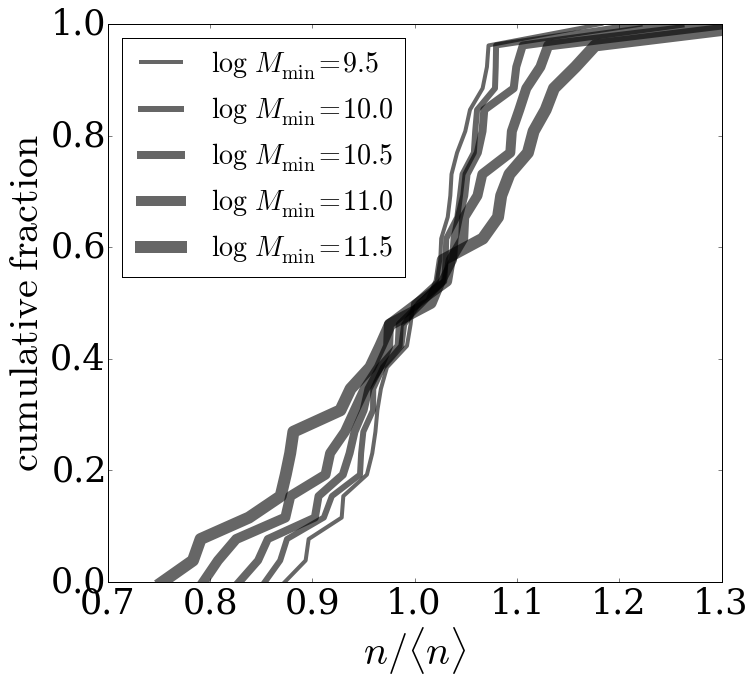

In [4]:
fig = plt.figure(1, figsize=(11,10))
ax = plt.axes()
set_ticklabels(ax, size=35)

n_lines = len(surface_density)
m_min = surface_density[:,0]
m_max = surface_density[:,1]
m_min_list = list(set(m_min))

for i in range(n_lines):
    if m_min[i] in m_min_list:
        m_min_list.remove(m_min[i])
        
        m_min_tmp = surface_density[i][0]
        sort_n = np.sort(surface_density[i][2:])
        n_points = len(sort_n)
        int_n = np.linspace(0.0,1.0,n_points)
        
        
        label = r"$\log\  M_{\rm min} = %.1f$"%(m_min[i])
        plt.plot(sort_n/sort_n.mean(), int_n, lw=2.0*(6-len(m_min_list)), alpha=0.6, label=label, color='black')
        
ax.set_xlim([0.7, 1.3])
ax.set_ylim([0.0,1.0])

plt.xlabel(r'$n/\langle n\rangle$', size=40)
plt.ylabel(r'$\mathrm{cumulative\ fraction}$', size=40)
plt.legend(loc=2, prop={'size':28})
plt.savefig('../paper/fig1.pdf', bbox_inches='tight')

/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


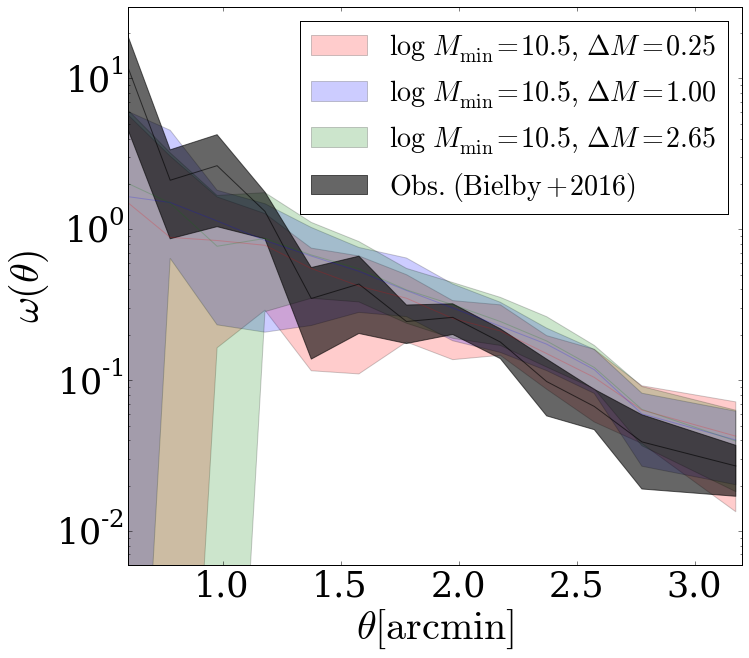

In [5]:
th,co,dco=np.genfromtxt('../data/obs/ACF/Bielby2015.txt',unpack=1)
th,c1,dcl1,dcu1=np.genfromtxt('../output/corr105_d025.txt',unpack=1)
th,c2,dcl2,dcu2=np.genfromtxt('../output/corr105_d05.txt',unpack=1)
th,c3,dcl3,dcu3=np.genfromtxt('../output/corr105_d10.txt',unpack=1)
th,c4,dcl4,dcu4=np.genfromtxt('../output/corr105_d20.txt',unpack=1)
th,c5,dcl5,dcu5=np.genfromtxt('../output/corr105_d30.txt',unpack=1)

dcl1[dcl1>=c1] = c1[dcl1>=c1]*.999999
dcl2[dcl2>=c2] = c2[dcl2>=c2]*.999999
dcl3[dcl3>=c3] = c3[dcl3>=c3]*.999999
dcl4[dcl4>=c4] = c4[dcl4>=c4]*.999999
dcl5[dcl5>=c5] = c5[dcl5>=c5]*.999999


fc=0.0
Ac=1.0/(1.0-fc)
Ac=Ac*Ac

fig = plt.figure(1, figsize=(11,10))
ax = plt.axes()
set_ticklabels(ax, size=35)

#plt.errorbar(th,Ac*c1,np.array([dcl1,dcu1]),label=r'$M_{\rm min}=10.5$'+' '+r'$\Delta M=0.25$')
#plt.errorbar(th,Ac*c2,Ac*np.array([dcl2,dcu2]),label=r'$\Delta M=0.5$')
#plt.errorbar(th,Ac*c3,Ac*np.array([dcl3,dcu3]),label=r'$\Delta M=1.0$')
#plt.errorbar(th,Ac*c4,Ac*np.array([dcl4,dcu4]),label=r'$\Delta M=2.0$')
#plt.errorbar(th, Ac*c5, Ac*np.array([dcl5,dcu5]),label=r'$\Delta M=2.65$')

ax.fill_between(th, Ac*c1 - dcl1, Ac*c1 + dcu1, facecolor='red', interpolate=True, alpha=0.2)
plt.plot(th, Ac*c1, color='red', alpha=0.2)

ax.fill_between(th, Ac*c3 - dcl3, Ac*c3 + dcu3, facecolor='blue', interpolate=True, alpha=0.2)
plt.plot(th, Ac*c3, color='blue', alpha=0.2)

ax.fill_between(th, Ac*c5 - dcl5, Ac*c5 + dcu5, facecolor='green', interpolate=True, alpha=0.2)
plt.plot(th, Ac*c5, color='green', alpha=0.2)

ax.fill_between(th, co - dco, co + dco, facecolor='black', interpolate=True, alpha=0.6)
plt.plot(th, co, color='black', alpha=0.6)


p1 = plt.Rectangle((0, 0), 1, 1, fc='red', alpha=0.2)
p2 = plt.Rectangle((0, 0), 1, 1, fc='blue', alpha=0.2)
p3 = plt.Rectangle((0, 0), 1, 1, fc='green', alpha=0.2)
p4 = plt.Rectangle((0, 0), 1, 1, fc='black', alpha=0.6)

label_list = [r'$\log\ M_{\rm min}=10.5 ,\ \Delta M=0.25$', 
              r'$\log\ M_{\rm min}=10.5 ,\ \Delta M=1.00$',
              r'$\log\ M_{\rm min}=10.5 ,\ \Delta M=2.65$',
              r'$\mathrm{Obs.\ (Bielby+2016)}$']
ax.legend([p1, p2, p3, p4], label_list,prop={'size':28},loc=1)

plt.xlabel(r'$\theta [\rm arcmin]$', size=40.0)
plt.ylabel(r'$\omega(\theta)$', size=40.0)
plt.xlim(0.6,3.2)
plt.ylim(0.006,30.0)

plt.yscale('log')
plt.savefig('../paper/fig5.pdf', bbox_inches='tight')

(9.5909554443611995, 11.032099028799999)


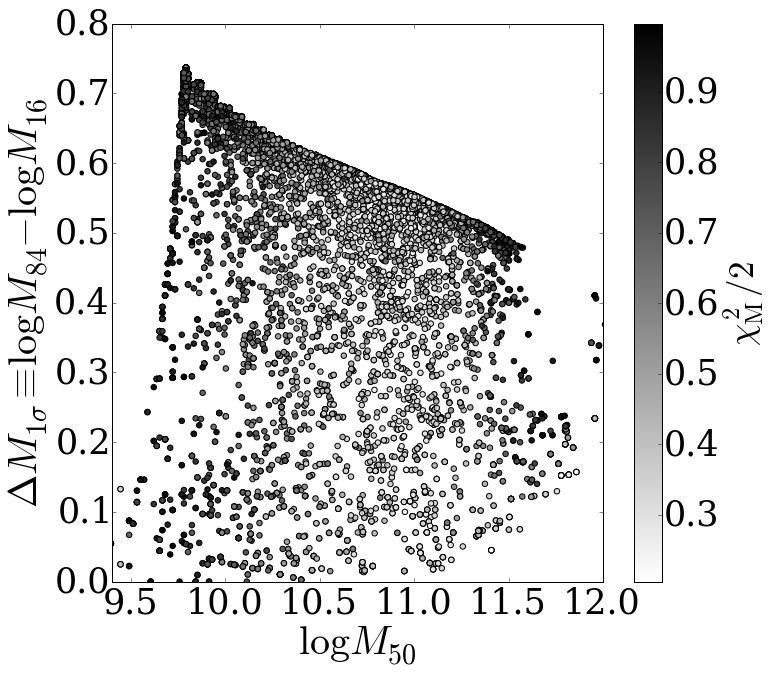

In [18]:
fig = plt.figure(1, figsize=(11,10))
ax = plt.axes()
set_ticklabels(ax, size=35)

parall = np.genfromtxt('../output/focc_1deg_fixed.txt')
m_min = parall[:,0]
m_max = parall[:,1]

m16 = np.percentile(m_min,16)
m84 = np.percentile(m_min,84)
print(m16, m84)

ii = (m_min > m16) & (m_min < m84)

m_50 = parall[:,7]
m_16 = parall[:,8]
m_84 = parall[:,9]

m_2 = parall[:,10]
m_97 = parall[:,11]
log_like = -parall[:,12]

ii = log_like < 1.0

bielby =  [11,1.2, r"$\mathrm{Bielby+2016}$"] # m_50 ,delta_M for Bielby et al 2016.
gawiser = [10.9, 1.8, r"$\mathrm{Gawiser+2007}$"]
ouchi = [10.0, 1.6, r"$\mathrm{Ouchi+2010}$"]


figa = plt.scatter(m_50[ii], m_84[ii]-m_16[ii], c=log_like[ii], 
            cmap = cm.gray_r,
            vmin = log_like[ii].min(),vmax = log_like[ii].max(),
            s=30.0, alpha=1.0)
#plt.scatter(bielby[0], bielby[1], s=500, label=bielby[2], marker='s',facecolors='white', edgecolors='black', lw=3)
#plt.scatter(ouchi[0], ouchi[1], s=500, label=ouchi[2], marker='>',facecolors='white', edgecolors='black',lw=3)
#plt.scatter(gawiser[0], gawiser[1], s=500, label=gawiser[2], marker='*', facecolors='white', edgecolors='black',lw=3)


font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 35}
plt.rc('font', **font)
cb = fig.colorbar(figa)
cb.set_label(r'$\chi_{\mathrm{M}}^2/2$')

plt.legend(loc=2,fontsize=27, scatterpoints=1)

plt.xlim(9.4,12.0)
plt.ylim(0,0.8)
plt.xlabel(r'$\log M_{50}$', size=40.0)
plt.ylabel(r'$\Delta M_{1\sigma}\equiv\log M_{84} - \log M_{16}$', size=40.0)
plt.savefig('../paper/fig4.pdf', bbox_inches='tight')

In [20]:
m50_16 = np.percentile(m_50[ii], 16)
m50_84 = np.percentile(m_50[ii], 84)
m50_50 = np.percentile(m_50[ii], 50)
print(m50_16, m50_84, m50_50)
print(m50_84 - m50_16)

(9.8892064274603761, 11.114510904848874, 10.508300728187253)
1.22530447739
